In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('./rainfall in india 1901-2015.csv')

def cleandata(area,starttime,endtime):
    cond1 = (df['SUBDIVISION']==area)
    cond2 = (df['YEAR']>=starttime)
    cond3 = (df['YEAR']<=endtime)
    
    data = df[cond1&cond2&cond3]
    data = data.drop(['SUBDIVISION','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL'],axis=1)
    data = data.melt(['YEAR']).reset_index()
    data = data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
    data.columns=['INDEX','YEAR','Month','rainfall']
    d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
       'OCT':10,'NOV':11,'DEC':12}
    data['Month']=data['Month'].map(d)
    data['Date']=pd.to_datetime(data.assign(Day=1).loc[:,['YEAR','Month','Day']])
    return data

location = 'HARYANA DELHI & CHANDIGARH'
years = []
for year in range(1905,2015,10):
    years.append(year)    
    

decable_data = []

for year in years:
    decable_data.append(cleandata(location,year,year+10))
    
data = decable_data[-1]

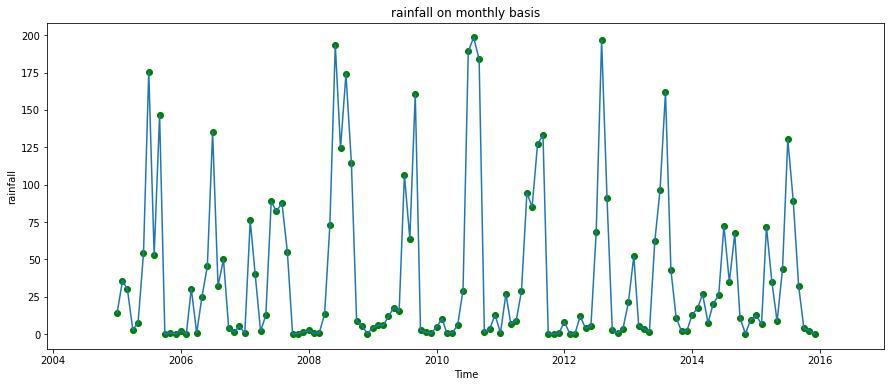

In [99]:
def plotgraph(data):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.rcParams['axes.xmargin'] = 0.1
    x = data['Date']
    y = data['rainfall']
    plt.plot(x,y)
    plt.scatter(x,y,color='green')
    plt.xlabel('Time')
    plt.ylabel('rainfall')
    plt.title('rainfall on monthly basis')
    plt.show()

    

# for a in decable_data:
#     plotgraph(a)


plotgraph(a)


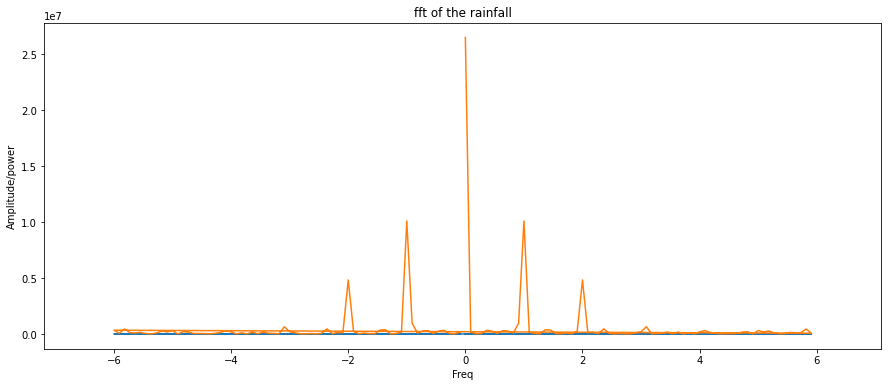

In [103]:
def calcfftandplot(data):
    x = data['Date']
    y = data['rainfall']
    fft_y = np.fft.fft(y)
    fft_y = np.abs(fft_y)
    fft_y_power = np.abs(fft_y)**2

    #1/12 coz its month
    freq = np.fft.fftfreq(len(x),1/12)

    plt.plot(freq,fft_y)
    plt.plot(freq,fft_y_power)

    plt.xlabel('Freq')
    plt.ylabel('Amplitude/power')
    plt.title('fft of the rainfall')
    
    plt.show()
    

calcfftandplot(data)

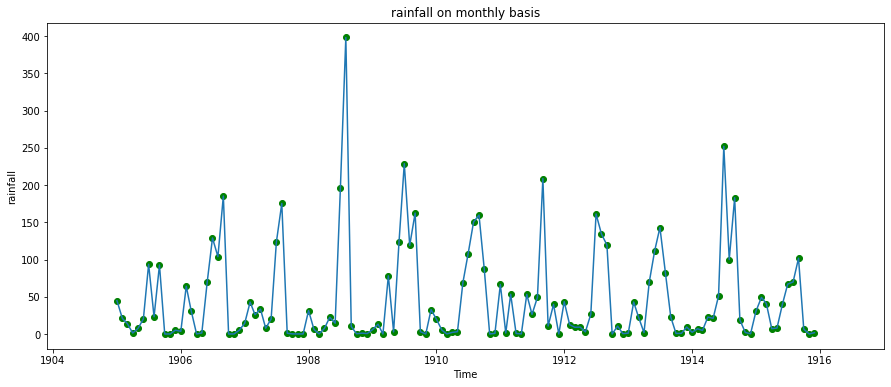

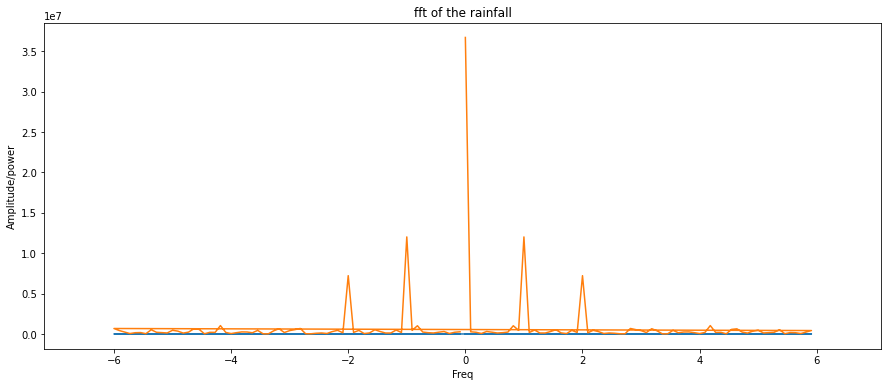

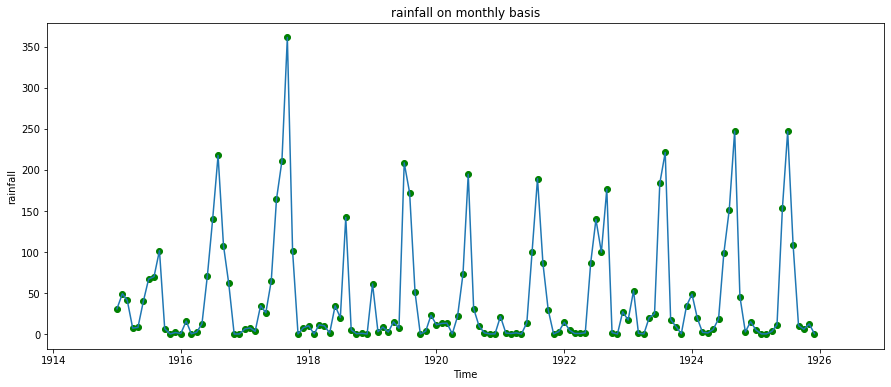

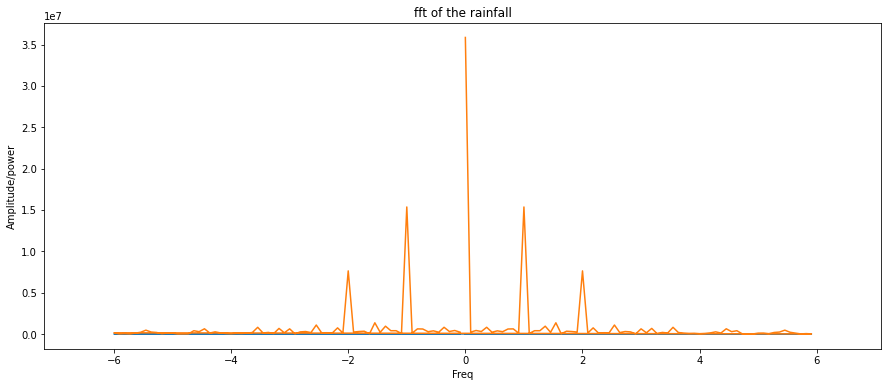

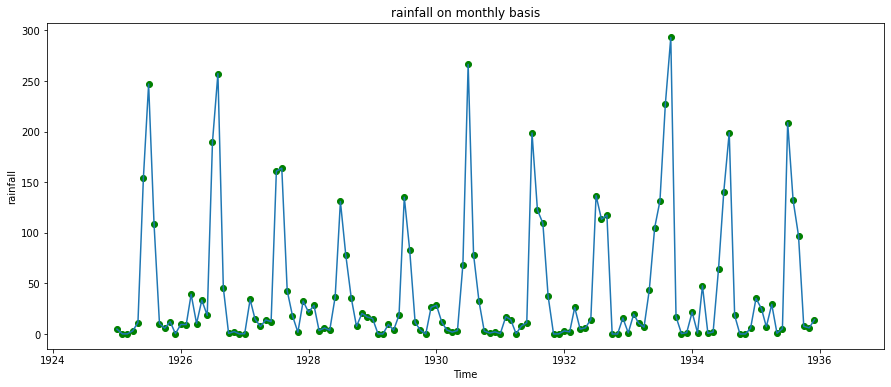

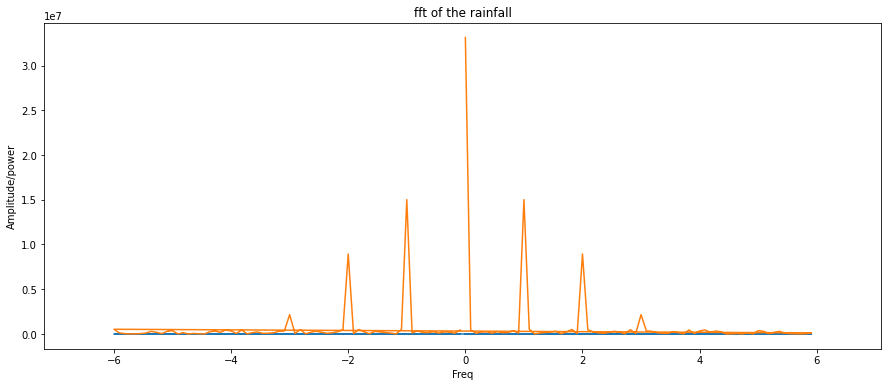

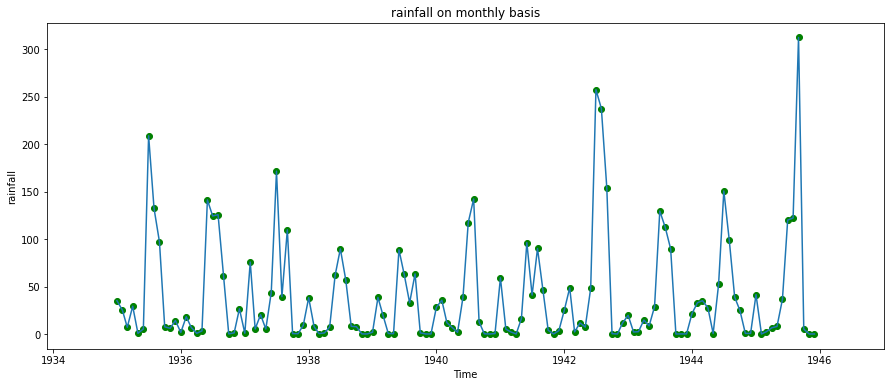

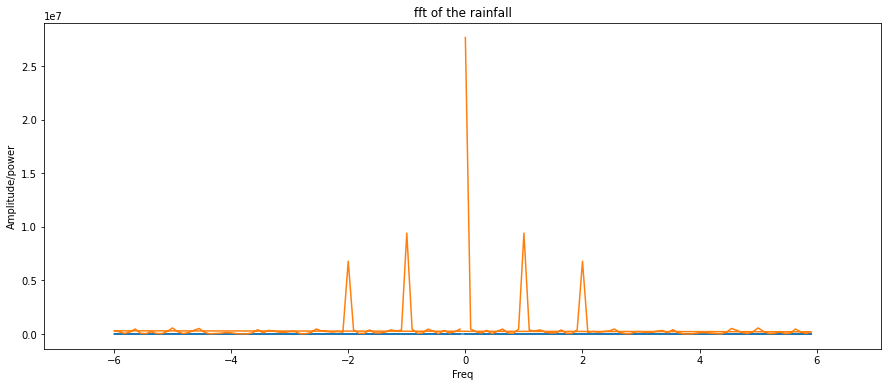

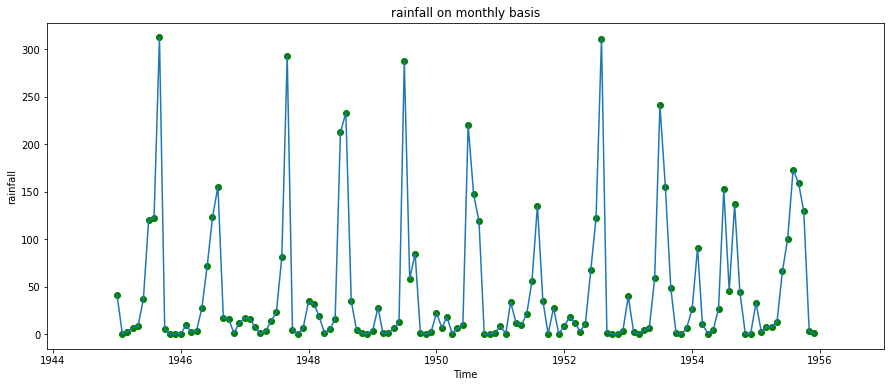

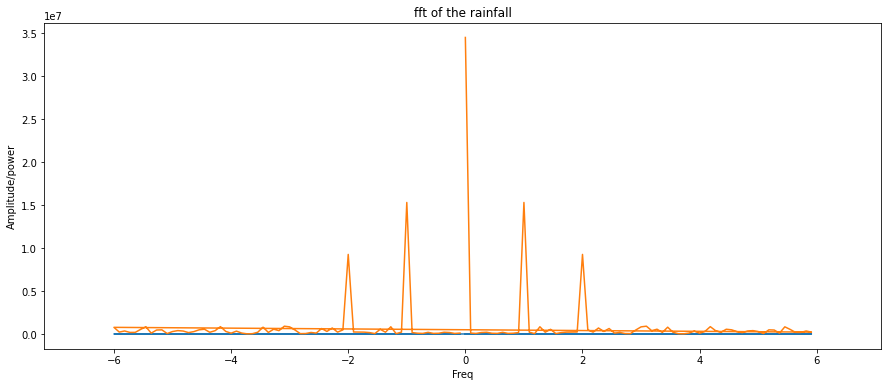

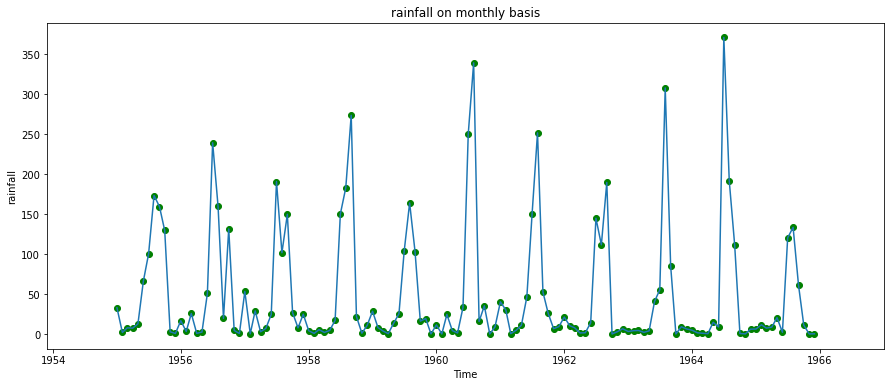

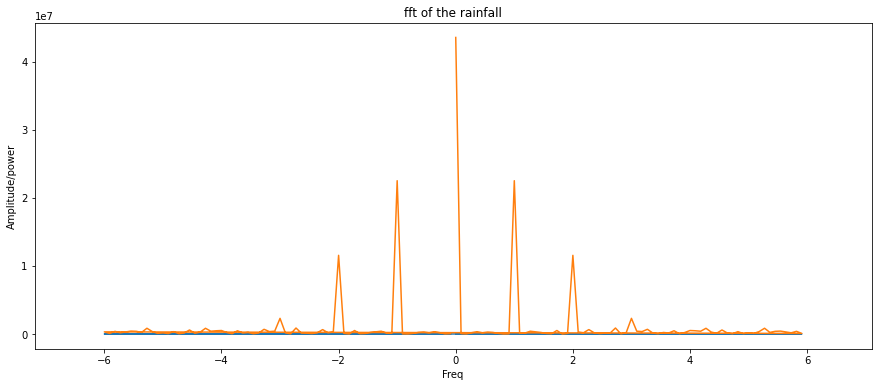

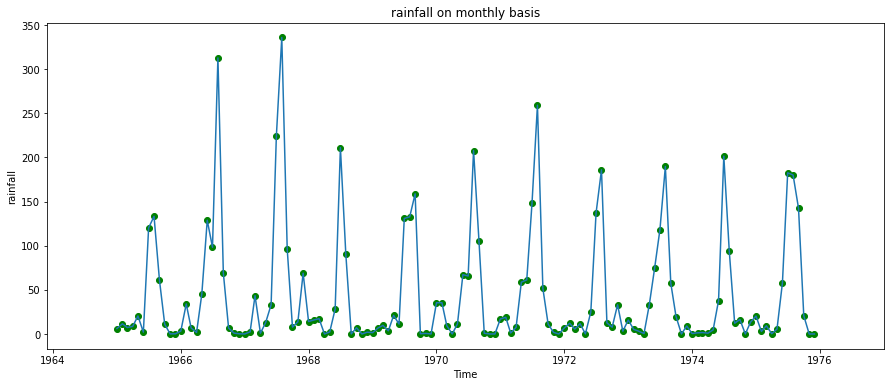

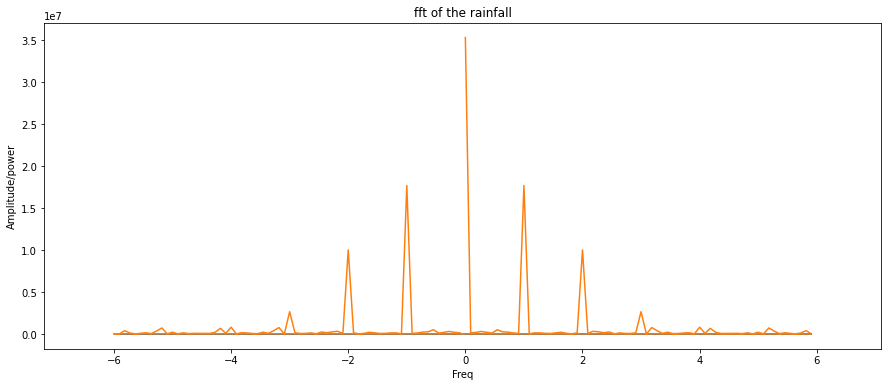

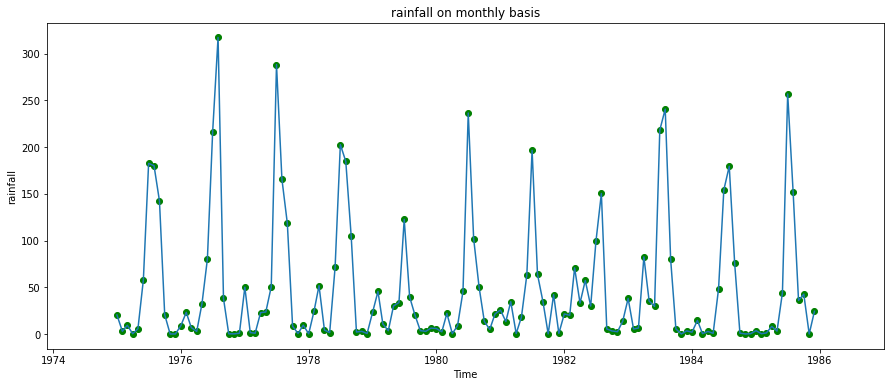

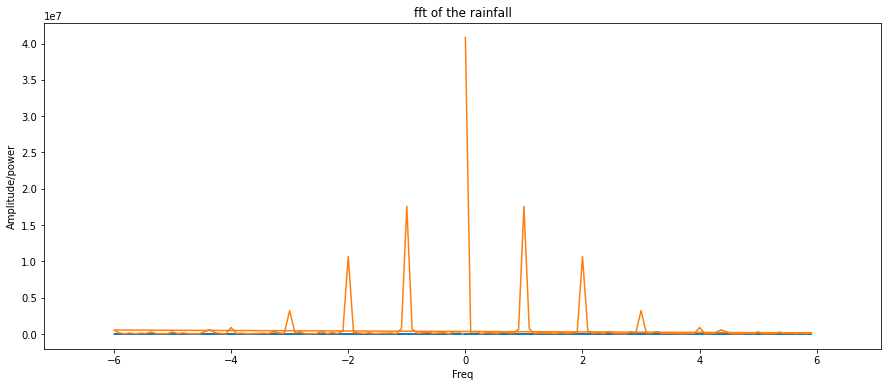

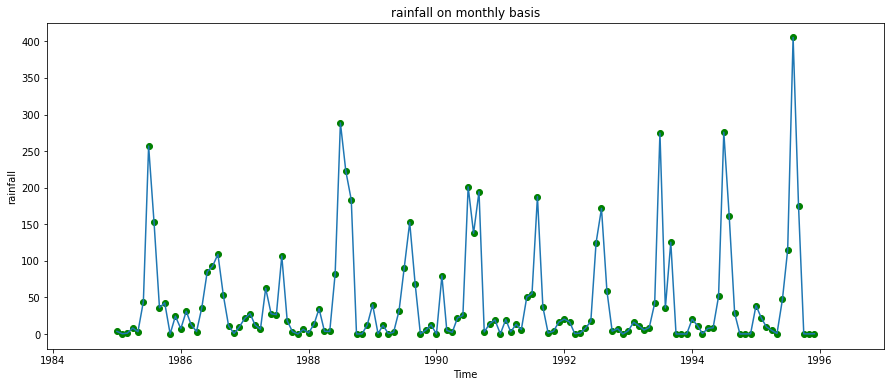

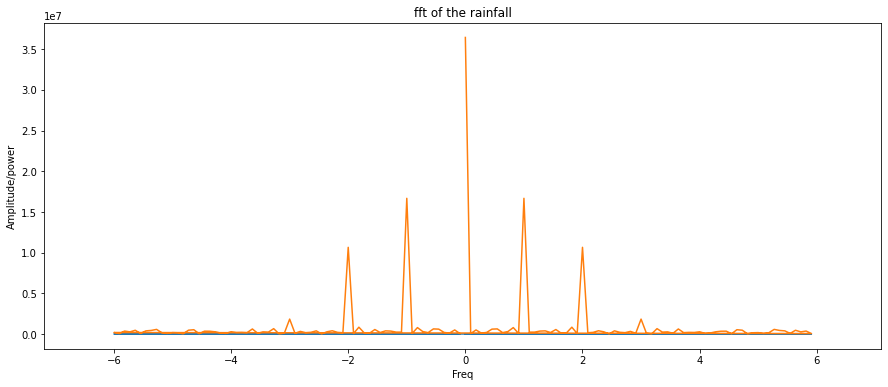

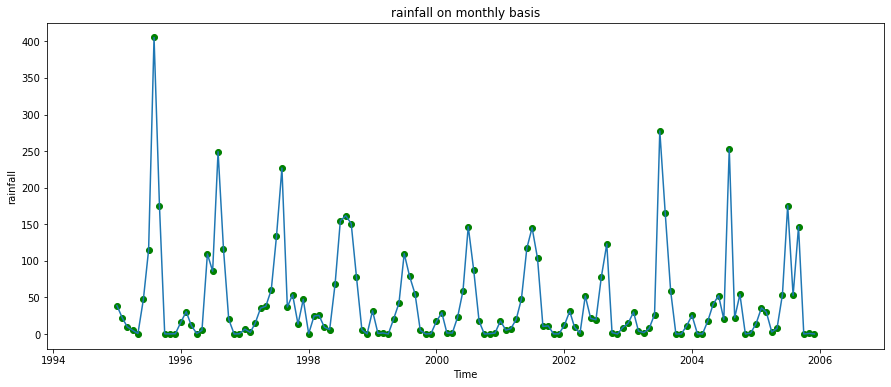

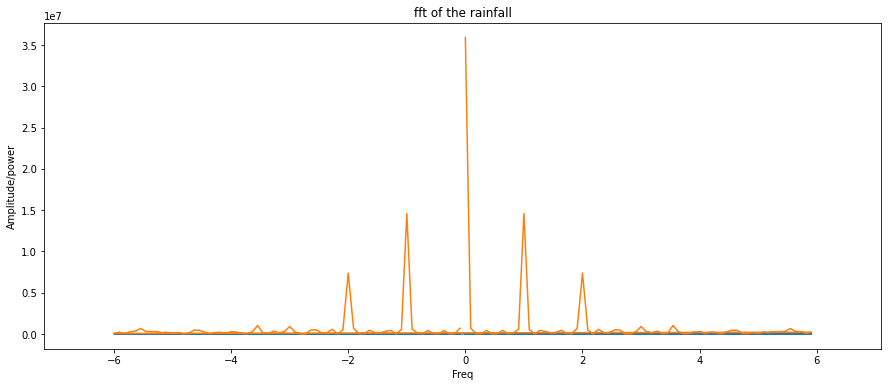

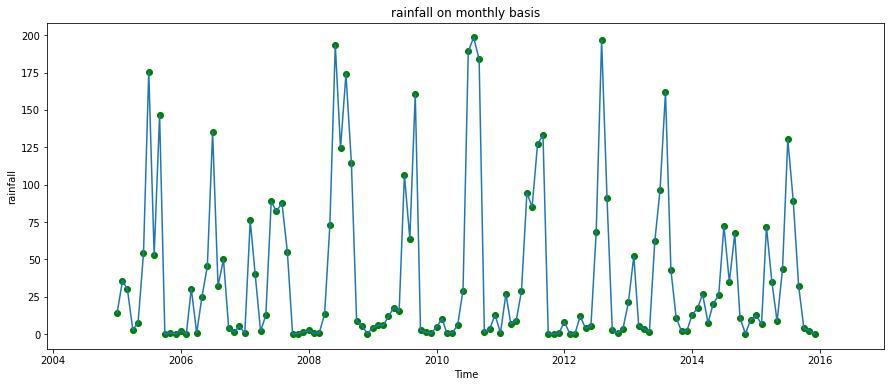

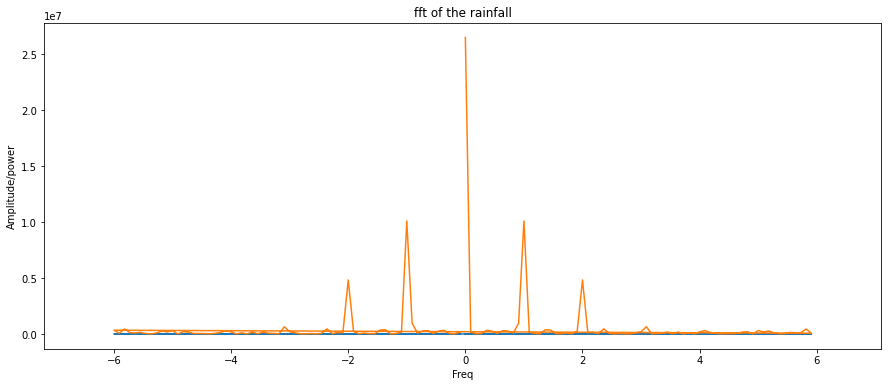

In [104]:
for a in decable_data:
    plotgraph(a)
    calcfftandplot(a)